📌 Summary

Dataset train.csv berisi 891 penumpang dengan 12 kolom:

PassengerId: ID unik penumpang

Survived: Status selamat (0 = tidak, 1 = ya)

Pclass: Kelas tiket (1, 2, 3)

Name, Sex, Age: Informasi personal

SibSp, Parch: Jumlah saudara/anak/ortu yang ikut

Ticket, Fare, Cabin, Embarked: Detail perjalanan

Dataset test.csv berisi 418 penumpang tanpa kolom Survived (digunakan untuk prediksi).

Dataset gender_submission.csv berisi contoh submission (baseline) dengan kolom PassengerId dan Survived.

📌 Problem

Tragedi Titanic menewaskan banyak penumpang. Faktor seperti jenis kelamin, umur, dan kelas tiket diduga berpengaruh terhadap kemungkinan selamat.
Masalah utamanya adalah menentukan faktor apa saja yang signifikan dalam menentukan peluang seseorang untuk selamat serta membangun model prediksi berdasarkan data penumpang.

📌 Objective

Analisis Eksploratif

Menemukan pola dari karakteristik penumpang yang lebih mungkin selamat (misalnya perempuan, anak-anak, kelas tiket 1).

Menangani missing values (terutama pada kolom Age & Cabin).

Membangun Model Prediksi

Membuat model machine learning yang dapat memprediksi apakah seorang penumpang di test set akan selamat atau tidak.

Mengukur performa model dengan akurasi, precision, recall, atau f1-score.

Mendapatkan Insight

Memberikan insight historis tentang faktor yang memengaruhi keselamatan di Titanic.

Menunjukkan bahwa data dapat membantu pengambilan keputusan pada situasi darurat serupa.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Initial Analysis

In [3]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Summary Statistic

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Dataset terdiri dari 891 baris (penumpang) dan 12 kolom. Berikut detail tiap kolom:

PassengerId (int64) → ID unik untuk tiap penumpang.

Survived (int64) → Status keselamatan (0 = tidak selamat, 1 = selamat).

Pclass (int64) → Kelas tiket (1 = kelas atas, 2 = kelas menengah, 3 = kelas bawah).

Name (object) → Nama penumpang.

Sex (object) → Jenis kelamin (male/female).

Age (float64) → Usia penumpang (ada 177 data hilang).

SibSp (int64) → Jumlah saudara kandung/pasangan yang ikut.

Parch (int64) → Jumlah orang tua/anak yang ikut.

Ticket (object) → Nomor tiket.

Fare (float64) → Harga tiket.

Cabin (object) → Nomor kabin (sangat banyak missing values, hanya 204 data tercatat).

Embarked (object) → Pelabuhan keberangkatan (C = Cherbourg, Q = Queenstown, S = Southampton; ada 2 data hilang).

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


PassengerId (int64) → ID unik penumpang.

Pclass (int64) → Kelas tiket (1, 2, 3).

Name (object) → Nama penumpang.

Sex (object) → Jenis kelamin.

Age (float64) → Usia penumpang (332 terisi, 86 missing).

SibSp (int64) → Jumlah saudara kandung/pasangan yang ikut.

Parch (int64) → Jumlah orang tua/anak yang ikut.

Ticket (object) → Nomor tiket.

Fare (float64) → Harga tiket (417 terisi, 1 missing).

Cabin (object) → Nomor kabin (91 terisi, sangat banyak missing).

Embarked (object) → Pelabuhan keberangkatan (C, Q, S).

In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1. PassengerId

Range: 1 – 891

Hanya berfungsi sebagai ID unik, tidak punya makna analisis.

2. Survived (Target)

Mean: 0.38 → 38% penumpang selamat

Distribusi tidak seimbang → lebih banyak yang meninggal (62%).

3. Pclass (Kelas Tiket)

Mean: 2.31 → sebagian besar penumpang ada di kelas 3.

Range: 1–3 (1 = kelas atas, 3 = kelas bawah).

4. Age (Usia)

Jumlah data valid: 714 (dari 891) → ada 177 missing.

Mean: 29,7 tahun → rata-rata penumpang dewasa muda.

Median: 28 tahun → distribusi agak normal.

Min: 0,42 tahun (bayi), Max: 80 tahun.

5. SibSp (Saudara/Spouse)

Mean: 0,52 → mayoritas penumpang tidak membawa saudara/pasangan.

Max: 8 orang.

6. Parch (Orang tua/Anak)

Mean: 0,38 → mayoritas tidak membawa orang tua/anak.

Max: 6 orang.

7. Fare (Harga Tiket)

Mean: 32,2

Median: 14,45 → lebih kecil dari mean → distribusinya right-skewed (ada tiket yang sangat mahal).

Range: 0 – 512 (beberapa tiket gratis atau promosi, beberapa sangat mahal di kelas 1).

In [8]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


1. PassengerId

Range: 892 – 1309 (418 penumpang).

Hanya sebagai ID unik, tidak relevan untuk analisis.

2. Pclass (Kelas Tiket)

Mean: 2.27 → mayoritas penumpang berada di kelas 3 (sama seperti train).

Range: 1–3.

3. Age (Usia)

Jumlah data valid: 332 dari 418 → ada 86 missing (~20%).

Mean: 30,3 tahun → hampir sama dengan train (29,7 tahun).

Median: 27 tahun.

Min: 0,17 tahun (bayi), Max: 76 tahun.

4. SibSp (Saudara/Spouse)

Mean: 0,45 → sebagian besar penumpang tidak membawa pasangan/saudara.

Max: 8 orang.

5. Parch (Orang tua/Anak)

Mean: 0,39 → mirip train, mayoritas tidak membawa orang tua/anak.

Max: 9 orang.

6. Fare (Harga Tiket)

Jumlah data valid: 417 dari 418 → ada 1 missing.

Mean: 35,6 → sedikit lebih tinggi dibanding train (32,2).

Median: 14,45 → distribusi right-skewed (ada tiket sangat mahal).

Range: 0 – 512 → sama seperti train.

In [9]:
# Summary statistics for numerical variables
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


1. PassengerId

ID unik dari 1–891 (tidak relevan untuk analisis).

2. Survived (Target)

Mean = 0.38 → hanya 38% penumpang selamat, sisanya 62% tidak selamat.

Distribusi tidak seimbang (imbalanced).

3. Pclass (Kelas Tiket)

Mean = 2.31 → mayoritas penumpang kelas 3.

Median = 3 → menunjukkan distribusi condong ke kelas bawah.

4. Age (Usia)

Data valid: 714 dari 891 (177 missing).

Rata-rata: 29,7 tahun → kebanyakan dewasa muda.

Median: 28 tahun, rentang 0.42 – 80 tahun.

5. SibSp (Saudara/Spouse di kapal)

Mean = 0.52, median = 0 → mayoritas penumpang sendirian tanpa pasangan/saudara.

Maksimum = 8 → ada penumpang dengan banyak keluarga ikut.

6. Parch (Orang tua/Anak di kapal)

Mean = 0.38, median = 0 → mayoritas tidak membawa orang tua/anak.

Maksimum = 6.

7. Fare (Harga Tiket)

Mean = 32,2, Median = 14,45 → distribusi right-skewed (ada tiket sangat mahal).

Rentang: 0 – 512 (ada tiket gratis hingga sangat mahal).

In [10]:
# Summary statistics for categorical variables
df_train.describe(include='object').T

,count,unique,top,freq
Name,891,891,"Dooley, Mr. Patrick",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,G6,4
Embarked,889,3,S,644


1. Name

Jumlah unik: 891 nama (semua penumpang punya nama berbeda).

Tidak ada yang berulang → bisa digunakan untuk feature engineering (misalnya gelar: Mr, Mrs, Miss, dll.).

2. Sex (Jenis Kelamin)

Kategori unik: 2 (male, female).

Distribusi:

Male: 577 penumpang (64,8%).

Female: 314 penumpang (35,2%).
👉 Mayoritas penumpang adalah laki-laki.

3. Ticket (Nomor Tiket)

Jumlah unik: 681 dari 891 tiket → beberapa tiket dipakai oleh lebih dari 1 penumpang (keluarga atau grup).

Nomor tiket paling sering muncul: 347082 (7 kali).

4. Cabin (Nomor Kabin)

Jumlah data valid: 204 (hanya ~23%).

Jumlah unik: 147 kabin.

Kabin paling sering muncul: G6 (4 kali).
Banyak data hilang, sehingga sulit dipakai langsung.

5. Embarked (Pelabuhan Keberangkatan)

Jumlah data valid: 889 (ada 2 missing).

Jumlah kategori: 3 (C, Q, S).

Distribusi:

S (Southampton): 644 penumpang (~72%) → mayoritas.

C (Cherbourg) dan Q (Queenstown) lebih sediki

In [11]:
# Summary statistics for numerical variables
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


1. PassengerId

Range: 892 – 1309 (418 penumpang).

Hanya sebagai ID unik, tidak dipakai untuk analisis.

2. Pclass (Kelas Tiket)

Mean: 2.27 → mayoritas penumpang ada di kelas 3.

Median: 3 → sama dengan train.csv, distribusi condong ke kelas bawah.

3. Age (Usia)

Data valid: 332 dari 418 → ada 86 missing (~20%).

Mean: 30,3 tahun, Median: 27 tahun → hampir sama dengan train.csv (29,7 tahun).

Rentang: 0,17 – 76 tahun.

4. SibSp (Saudara/Spouse)

Mean: 0,45, Median: 0 → mayoritas penumpang bepergian sendirian.

Maksimum: 8.

5. Parch (Orang tua/Anak)

Mean: 0,39, Median: 0 → mirip dengan train.csv, mayoritas tidak membawa orang tua/anak.

Maksimum: 9 → ada penumpang dengan keluarga besar.

6. Fare (Harga Tiket)

Data valid: 417 dari 418 → ada 1 missing.

Mean: 35,6, Median: 14,45 → distribusinya right-skewed (ada tiket sangat mahal).

Rentang: 0 – 512.

In [12]:
# Summary statistics for categorical variables
df_test.describe(include='object').T

,count,unique,top,freq
Name,418,418,"Peter, Master. Michael J",1
Sex,418,2,male,266
Ticket,418,363,PC 17608,5
Cabin,91,76,B57 B59 B63 B66,3
Embarked,418,3,S,270


1. Name

418 unik (1 per orang) → sama seperti train, tidak bisa dipakai langsung sebagai fitur.

Bisa diekstrak title (Mr, Mrs, Miss, Master, dll.) → sering jadi fitur penting untuk survival.

2. Sex

266 male (63,6%)

152 female (36,4%)

Pola ini mirip train.csv (64,8% male vs 35,2% female).

➝ Sex dipastikan jadi variabel penting untuk prediksi survival.

3. Ticket

363 unik dari 418 → ada duplikasi tiket.

PC 17608 paling banyak muncul (5 penumpang).

Sama dengan train.csv → tiket bisa dipakai untuk cek keluarga/group traveler.

4. Cabin

Hanya 91 dari 418 yang terisi (~22%) → missing besar (sama dengan train ~77% missing).

76 nilai unik.

B57 B59 B63 B66 muncul 3 kali.

Bisa diolah → ambil huruf deck (A–G) sebagai kategori.

5. Embarked

3 kategori: S (270), C (102), Q (46).

Distribusi mirip train.csv (S dominan).

In [13]:
print('data train : ', df_train.shape)
print('data test : ', df_test.shape)
print('data train column : ',df_train.columns)
print('data test column : ', df_test.columns)

data train :  (891, 12)
data test :  (418, 11)
data train column :  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
data test column :  Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


# DATA QUALITY CHECK

In [14]:
def displayNULL(df, dataset_name=None):
    total_rows = len(df)

    missing_df = df.isnull().sum().reset_index()
    missing_df.columns = ["Feature", "Missing_Count"]
    missing_df = missing_df[missing_df["Missing_Count"] > 0]
    missing_df["Missing_%"] = (missing_df["Missing_Count"] / total_rows * 100).round(2)
    missing_df = missing_df.sort_values(by="Missing_Count", ascending=False).reset_index(drop=True)

    total_missing = missing_df["Missing_Count"].sum()

    print("=" * 40)
    if dataset_name:
        print(f"🔎 Missing Value Summary for: {dataset_name}")
    else:
        print("🔎 Missing Value Summary:")
    print("=" * 40)

    if total_missing == 0:
        print(f"✅ No missing values detected in {total_rows:,} rows.")
    else:
        try:
            from tabulate import tabulate
            print(tabulate(missing_df, headers="keys", tablefmt="pretty", showindex=False, colalign=("left", "left", "left")))
        except ImportError:
            print(missing_df.to_string(index=False))

        print(f"\n⚠️  Total missing values: {total_missing:,} out of {total_rows:,} rows.")

print("Missing value train dataset: ")
displayNULL(df_train, dataset_name="Train Set")

print("\nMissing value test dataset: ")
displayNULL(df_test, dataset_name="Test Set")

Missing value train dataset: 
🔎 Missing Value Summary for: Train Set
+----------+---------------+-----------+
| Feature  | Missing_Count | Missing_% |
+----------+---------------+-----------+
| Cabin    | 687           | 77.1      |
| Age      | 177           | 19.87     |
| Embarked | 2             | 0.22      |
+----------+---------------+-----------+

⚠️  Total missing values: 866 out of 891 rows.

Missing value test dataset: 
🔎 Missing Value Summary for: Test Set
+---------+---------------+-----------+
| Feature | Missing_Count | Missing_% |
+---------+---------------+-----------+
| Cabin   | 327           | 78.23     |
| Age     | 86            | 20.57     |
| Fare    | 1             | 0.24      |
+---------+---------------+-----------+

⚠️  Total missing values: 414 out of 418 rows.


🔹 Train Set

Cabin (77%) → terlalu banyak kosong → sulit diisi → solusi: drop / ubah jadi fitur kategorikal sederhana.

Age (19.9%) → masih bisa diisi → solusi: imputasi median/mean per grup (misalnya per Pclass + Sex + Title).

Embarked (0.22%) → kecil sekali → solusi: isi dengan modus (S).

🔹 Test Set

Cabin (78%) → sama seperti train, perlakuan konsisten.

Age (20.6%) → imputasi sama seperti train.

Fare (0.24%) → 1 missing → solusi: isi dengan median Fare sesuai Pclass.

In [15]:
# Drop kolom Cabin (train & test)
df_train_clean = df_train.drop(columns=["Cabin"])
df_test_clean = df_test.drop(columns=["Cabin"])

# Drop row yang missing pada Embarked (hanya 2 baris di train)
df_train_clean = df_train_clean.dropna(subset=["Embarked"])

# Drop row yang missing pada Fare (hanya 1 baris di test)
df_test_clean = df_test_clean.dropna(subset=["Fare"])

print("Train setelah drop:", df_train_clean.shape)
print("Test setelah drop:", df_test_clean.shape)

Train setelah drop: (889, 11)
Test setelah drop: (417, 10)


Drop kolom Cabin
Karena terlalu banyak missing → aman untuk dihapus.

Drop baris Embarked (train)
Hanya 2 baris → efeknya ke dataset kecil sekali.

Drop baris Fare (test)
Hanya 1 baris → aman juga.

Output shape
Kamu bisa lihat perubahan jumlah baris & kolom.

In [16]:
def impute_age(df):
    df["Age"] = df.groupby(["Sex", "Pclass"])["Age"].transform(lambda x: x.fillna(x.median()))
    return df

# Terapkan
df_train_clean = impute_age(df_train_clean)
df_test_clean = impute_age(df_test_clean)

# Cek hasil
print("Missing Age Train:", df_train_clean["Age"].isnull().sum())
print("Missing Age Test:", df_test_clean["Age"].isnull().sum())

Missing Age Train: 0
Missing Age Test: 0


🔹 Permasalahan

Kolom Age memiliki missing value:

Train set: 19.9% hilang.

Test set: 20.6% hilang.

Kalau langsung dihapus → data jadi banyak hilang (kurang bagus).

Kalau langsung isi dengan median global → bisa bias (karena pola umur penumpang berbeda-beda berdasarkan kelas & jenis kelamin).

🔹 Solusi yang Dipakai

Membagi data berdasarkan Sex dan Pclass

Misalnya:

Laki-laki kelas 1 (Sex=male, Pclass=1)

Perempuan kelas 3 (Sex=female, Pclass=3)

Setiap grup akan punya distribusi umur yang berbeda.

Isi Age yang kosong dengan median dari grup tersebut

Contoh: kalau ada penumpang female kelas 1 tanpa umur, akan diisi dengan median umur female kelas 1.

Jadi lebih representatif dibanding median keseluruhan.

Konsistensi antara train & test set

Train set: Age kosong terisi semua.

Test set: Age kosong juga terisi dengan aturan sama.

In [17]:
def check_duplicates_report(df, dataset_name):
    duplicates_count = df.duplicated().sum()
    total_rows = len(df)

    print("=" * 40)
    print(f"🔍 {dataset_name} Duplicate Analysis")
    print("=" * 40)

    if duplicates_count == 0:
        print(f"✅ No duplicates found in {total_rows:,} rows")
    else:
        print(f"⚠️  {duplicates_count} duplicates found ({duplicates_count/total_rows:.2%})")
        print(f"    Total rows affected: {duplicates_count:,}/{total_rows:,}")

datasets = {
    "Training Data": df_train,
    "Test Data": df_test
}

duplicate_summary = {}
for name, data in datasets.items():
    check_duplicates_report(data, name)
    duplicate_summary[name] = {
        "duplicates": data.duplicated().sum(),
        "total_rows": len(data)
    }
    print()

🔍 Training Data Duplicate Analysis
✅ No duplicates found in 891 rows

🔍 Test Data Duplicate Analysis
✅ No duplicates found in 418 rows



Train set (891 rows) → tidak ada duplikasi → aman.

Test set (418 rows) → juga tidak ada duplikasi → aman.

In [18]:
# Summary statistics for numerical variables
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [19]:
# Summary statistics for categorical variables
df_train.describe(include='object').T

,count,unique,top,freq
Name,891,891,"Dooley, Mr. Patrick",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,G6,4
Embarked,889,3,S,644


# Summary statistics for categorical variables

## Data Train

In [20]:
num_features = ["PassengerId", "Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]
cat_features = ["Name", "Sex", "Ticket", "Cabin", "Embarked"]

def checking_outlier(list_feature, df, dataset_name):
    print("=" * 40)
    print(f"🔍 {dataset_name} Checking outlier")
    print("=" * 40)
    outlier_info = []
    for feature in list_feature:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        if len(outliers) == 0:
            pass
        else:
            outlier_info.append({
            "Feature": feature,
            "Outlier Count": len(outliers),
            # "Outlier Detail": outliers.tolist()
            })
    return pd.DataFrame(outlier_info)

checking_outlier(list_feature=num_features, df=df_train, dataset_name="Training data")

🔍 Training data Checking outlier


,Feature,Outlier Count
0,Age,11
1,SibSp,46
2,Parch,213
3,Fare,116


In [21]:
# Cek ticket yang mengandung 'LINE'
tickets_line = df_train_clean[df_train_clean["Ticket"].str.contains("LINE", na=False)]

print("🔎 Penumpang dengan Ticket = LINE")
display(tickets_line[["PassengerId", "Pclass", "Name", "Sex", "Age", "Fare", "Embarked", "Ticket"]])

# Cek ticket non-numeric (bukan angka murni)
tickets_non_numeric = df_train_clean[~df_train_clean["Ticket"].str.isnumeric()]

print(f"\n🔎 Ditemukan {len(tickets_non_numeric)} penumpang dengan Ticket non-numeric")
display(tickets_non_numeric[["PassengerId", "Pclass", "Name", "Sex", "Age", "Fare", "Embarked", "Ticket"]])

🔎 Penumpang dengan Ticket = LINE


,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Ticket
179,180,3,"Leonard, Mr. Lionel",male,36.0,0.0,S,LINE
271,272,3,"Tornquist, Mr. William Henry",male,25.0,0.0,S,LINE
302,303,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0.0,S,LINE
597,598,3,"Johnson, Mr. Alfred",male,49.0,0.0,S,LINE



🔎 Ditemukan 230 penumpang dengan Ticket non-numeric


,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Ticket
0,1,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,A/5 21171
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,PC 17599
2,3,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,STON/O2. 3101282
10,11,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,16.7000,S,PP 9549
12,13,3,"Saundercock, Mr. William Henry",male,20.0,8.0500,S,A/5. 2151
...,...,...,...,...,...,...,...,...
867,868,1,"Roebling, Mr. Washington Augustus II",male,31.0,50.4958,S,PC 17590
874,875,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,24.0000,C,P/PP 3381
883,884,2,"Banfield, Mr. Frederick James",male,28.0,10.5000,S,C.A./SOTON 34068
884,885,3,"Sutehall, Mr. Henry Jr",male,25.0,7.0500,S,SOTON/OQ 392076


🔍 Jumlah outlier Fare <= 0 sebelum perbaikan: 15
     PassengerId  Pclass Embarked  Fare
179          180       3        S   0.0
263          264       1        S   0.0
271          272       3        S   0.0
277          278       2        S   0.0
302          303       3        S   0.0
413          414       2        S   0.0
466          467       2        S   0.0
481          482       2        S   0.0
597          598       3        S   0.0
633          634       1        S   0.0

✅ Setelah perbaikan:
Fare <= 0 sekarang: 0
Contoh data setelah diubah:
     PassengerId  Pclass Embarked   Fare
179          180       3        S   8.05
263          264       1        S  52.00
271          272       3        S   8.05
277          278       2        S  13.50
302          303       3        S   8.05
413          414       2        S  13.50
466          467       2        S  13.50
481          482       2        S  13.50
597          598       3        S   8.05
633          634       1     

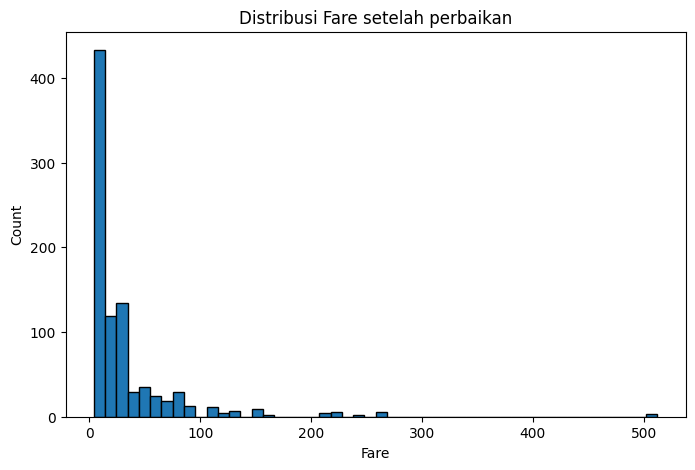

In [22]:
def fix_fare_outliers(df, verbose=True, plot=True):
    # Simpan index sebelum perbaikan
    idx_outliers = df[df["Fare"] <= 0].index

    if verbose:
        print("="*60)
        print(f"🔍 Jumlah outlier Fare <= 0 sebelum perbaikan: {len(idx_outliers)}")
        print("="*60)
        print(df.loc[idx_outliers, ["PassengerId", "Pclass", "Embarked", "Fare"]].head(10))

    # Imputasi
    df.loc[df["Fare"] <= 0, "Fare"] = df.groupby(["Pclass", "Embarked"])["Fare"].transform(lambda x: x.median())

    if verbose:
        print("\n✅ Setelah perbaikan:")
        print(f"Fare <= 0 sekarang: {(df['Fare'] <= 0).sum()}")
        print("Contoh data setelah diubah:")
        print(df.loc[idx_outliers, ["PassengerId", "Pclass", "Embarked", "Fare"]].head(10))

    # Plot distribusi
    if plot:
        plt.figure(figsize=(8,5))
        plt.hist(df["Fare"], bins=50, edgecolor="k")
        plt.title("Distribusi Fare setelah perbaikan")
        plt.xlabel("Fare")
        plt.ylabel("Count")
        plt.show()

    return df

# Terapkan pada train
df_train_clean = fix_fare_outliers(df_train_clean)

In [23]:
from tabulate import tabulate

def check_outlier_detail(df, dataset_name="Dataset"):
    print("=" * 60)
    print(f"🔎 Outlier Detail Check for {dataset_name}")
    print("=" * 60)

    # Buat dictionary cek outlier
    checks = {
        "Age < 0": df[df["Age"] < 0],
        "Age > 100": df[df["Age"] > 100],
        "SibSp > 10": df[df["SibSp"] > 10],
        "Parch > 10": df[df["Parch"] > 10],
        "Fare <= 0": df[df["Fare"] <= 0],
    }

    for desc, outlier_df in checks.items():
        print(f"\n👉 {desc} (found {len(outlier_df)} rows)")
        print("-" * 40)
        if len(outlier_df) > 0:
            print(tabulate(outlier_df.head(10), headers="keys", tablefmt="pretty"))
            if len(outlier_df) > 10:
                print(f"... and {len(outlier_df)-10} more rows")
        else:
            print("✅ No outlier found.")

# Contoh jalankan
check_outlier_detail(df_train_clean, dataset_name="Train Set")

🔎 Outlier Detail Check for Train Set

👉 Age < 0 (found 0 rows)
----------------------------------------
✅ No outlier found.

👉 Age > 100 (found 0 rows)
----------------------------------------
✅ No outlier found.

👉 SibSp > 10 (found 0 rows)
----------------------------------------
✅ No outlier found.

👉 Parch > 10 (found 0 rows)
----------------------------------------
✅ No outlier found.

👉 Fare <= 0 (found 0 rows)
----------------------------------------
✅ No outlier found.


In [24]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Tambah fitur baru log-transform
df_train_clean["Fare_log"] = np.log1p(df_train_clean["Fare"])

# Histogram Fare asli
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df_train_clean["Fare"],
    nbinsx=50,
    name="Fare (asli)",
    opacity=0.6
))

# Histogram Fare setelah log
fig.add_trace(go.Histogram(
    x=df_train_clean["Fare_log"],
    nbinsx=50,
    name="Fare (log)",
    opacity=0.6
))

# Layout

fig.update_layout(
    title="Distribusi Fare vs Fare (Log Transform)",
    xaxis_title="Fare Value",
    yaxis_title="Count",
    barmode="overlay",
    template="plotly_white"
)

fig.show()

In [25]:
def check_high_fare(df, threshold=500):
    high_fare = df[df["Fare"] >= threshold]
    print(f"🔎 Ditemukan {len(high_fare)} penumpang dengan Fare >= {threshold}")
    display(high_fare[["PassengerId", "Pclass", "Name", "Sex", "Age", "Fare", "Embarked"]])
    return high_fare

high_fare_passengers = check_high_fare(df_train_clean, 500)

🔎 Ditemukan 3 penumpang dengan Fare >= 500


,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked
258,259,1,"Ward, Miss. Anna",female,35.0,512.3292,C
679,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,512.3292,C
737,738,1,"Lesurer, Mr. Gustave J",male,35.0,512.3292,C


Ditemukan 3 penumpang kelas 1 (Pclass 1) dengan tarif tiket sangat tinggi, yaitu 512.33. Setelah ditelusuri, nilai ini memang valid karena mereka membeli suite mewah di Titanic (Embarked = C). Jadi, data ini bukan error input melainkan benar-benar merepresentasikan kondisi historis.

## Data Test

In [26]:
checking_outlier(list_feature=[feature for feature in num_features if feature != 'Survived'], df=df_test, dataset_name="Test data")

🔍 Test data Checking outlier


,Feature,Outlier Count
0,Age,2
1,SibSp,11
2,Parch,94
3,Fare,55


In [27]:
# Cek ticket yang mengandung 'LINE'
tickets_line = df_test_clean[df_test_clean["Ticket"].str.contains("LINE", na=False)]

print("🔎 Penumpang dengan Ticket = LINE")
display(tickets_line[["PassengerId", "Pclass", "Name", "Sex", "Age", "Fare", "Embarked", "Ticket"]])

# Cek ticket non-numeric (bukan angka murni)
tickets_non_numeric = df_test_clean[~df_test_clean["Ticket"].str.isnumeric()]

print(f"\n🔎 Ditemukan {len(tickets_non_numeric)} penumpang dengan Ticket non-numeric")
display(tickets_non_numeric[["PassengerId", "Pclass", "Name", "Sex", "Age", "Fare", "Embarked", "Ticket"]])

🔎 Penumpang dengan Ticket = LINE


,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Ticket



🔎 Ditemukan 122 penumpang dengan Ticket non-numeric


,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Ticket
9,901,3,"Davies, Mr. John Samuel",male,21.0,24.1500,S,A/4 48871
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,61.1750,S,W.E.P. 5734
15,907,2,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",female,24.0,27.7208,C,SC/PARIS 2167
18,910,3,"Ilmakangas, Miss. Ida Livija",female,27.0,7.9250,S,STON/O2. 3101270
20,912,1,"Rothschild, Mr. Martin",male,55.0,59.4000,C,PC 17603
...,...,...,...,...,...,...,...,...
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,13.8625,C,SC/PARIS 2166
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,13.7750,S,SOTON/O.Q. 3101315
413,1305,3,"Spector, Mr. Woolf",male,24.0,8.0500,S,A.5. 3236
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,108.9000,C,PC 17758


In [28]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Tambah fitur baru log-transform
df_test_clean["Fare_log"] = np.log1p(df_test_clean["Fare"])

# Histogram Fare asli
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df_test_clean["Fare"],
    nbinsx=50,
    name="Fare (asli)",
    opacity=0.6
))

# Histogram Fare setelah log
fig.add_trace(go.Histogram(
    x=df_test_clean["Fare_log"],
    nbinsx=50,
    name="Fare (log)",
    opacity=0.6
))

# Layout

fig.update_layout(
    title="Distribusi Fare vs Fare (Log Transform)",
    xaxis_title="Fare Value",
    yaxis_title="Count",
    barmode="overlay",
    template="plotly_white"
)

fig.show()

**Distribusi Fare Asli (biru)**

Terlihat sangat skewed (miring ke kanan).

Mayoritas penumpang membayar tiket dengan harga relatif rendah (0–50).

Namun ada sebagian kecil penumpang dengan Fare yang sangat tinggi (hingga >500), sehingga menimbulkan ekor panjang (long tail).

**Distribusi Fare Log (merah)**

Setelah dilakukan log-transform, distribusi menjadi lebih normal (lebih seimbang).

Efek outlier dari tiket mahal tidak lagi terlalu dominan.

Membantu algoritma machine learning lebih mudah mengenali pola karena data lebih terdistribusi merata.

**Kesimpulan**

Fare asli: menggambarkan kondisi real harga tiket, tapi sangat tidak seimbang.

Fare log: lebih stabil untuk analisis & pemodelan, terutama bila ingin memprediksi Survival menggunakan algoritma yang sensitif terhadap distribusi data (misalnya regresi, SVM, NN).

In [29]:
from tabulate import tabulate

def check_outlier_detail(df, dataset_name="Dataset"):
    print("=" * 60)
    print(f"🔎 Outlier Detail Check for {dataset_name}")
    print("=" * 60)

    # Buat dictionary cek outlier
    checks = {
        "Age < 0": df[df["Age"] < 0],
        "Age > 100": df[df["Age"] > 100],
        "SibSp > 10": df[df["SibSp"] > 10],
        "Parch > 10": df[df["Parch"] > 10],
        "Fare <= 0": df[df["Fare"] <= 0],
    }

    for desc, outlier_df in checks.items():
        print(f"\n👉 {desc} (found {len(outlier_df)} rows)")
        print("-" * 40)
        if len(outlier_df) > 0:
            print(tabulate(outlier_df.head(10), headers="keys", tablefmt="pretty"))
            if len(outlier_df) > 10:
                print(f"... and {len(outlier_df)-10} more rows")
        else:
            print("✅ No outlier found.")

# Contoh jalankan
check_outlier_detail(df_test_clean, dataset_name="Test Set")

🔎 Outlier Detail Check for Test Set

👉 Age < 0 (found 0 rows)
----------------------------------------
✅ No outlier found.

👉 Age > 100 (found 0 rows)
----------------------------------------
✅ No outlier found.

👉 SibSp > 10 (found 0 rows)
----------------------------------------
✅ No outlier found.

👉 Parch > 10 (found 0 rows)
----------------------------------------
✅ No outlier found.

👉 Fare <= 0 (found 2 rows)
----------------------------------------
+-----+-------------+--------+---------------------------------------+------+------+-------+-------+--------+------+----------+----------+
|     | PassengerId | Pclass |                 Name                  | Sex  | Age  | SibSp | Parch | Ticket | Fare | Embarked | Fare_log |
+-----+-------------+--------+---------------------------------------+------+------+-------+-------+--------+------+----------+----------+
| 266 |    1158     |   1    | Chisholm, Mr. Roderick Robert Crispin | male | 42.0 |   0   |   0   | 112051 | 0.0  |    S 

In [30]:
def check_high_fare(df, threshold=500):
    high_fare = df[df["Fare"] >= threshold]
    print(f"🔎 Ditemukan {len(high_fare)} penumpang dengan Fare >= {threshold}")
    display(high_fare[["PassengerId", "Pclass", "Name", "Sex", "Age", "Fare", "Embarked"]])
    return high_fare

high_fare_passengers = check_high_fare(df_test_clean, 500)

🔎 Ditemukan 1 penumpang dengan Fare >= 500


,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,512.3292,C


# EDA

In [31]:
import plotly.express as px
fig = px.histogram(
    df_train,
    x="Age",
    nbins=30,
    marginal="box",  # bisa tambah boxplot di atas
    title="Distribusi Usia Penumpang",
    color_discrete_sequence=["skyblue"]
)

fig.update_layout(
    bargap=0.1,
    xaxis_title="Age",
    yaxis_title="Count"
)

Mayoritas Penumpang Berusia Muda

Distribusi condong ke usia 20–30 tahun, dengan puncak sekitar usia 20-an.

Artinya, sebagian besar penumpang Titanic adalah orang dewasa muda.

Anak-anak juga cukup banyak

Terlihat ada sekelompok penumpang dengan usia <10 tahun.

Ini menunjukkan Titanic juga membawa cukup banyak keluarga dengan anak kecil.

Jumlah Penumpang Menurun Seiring Usia

Setelah usia 30 tahun, jumlah penumpang menurun secara bertahap.

Sangat sedikit penumpang yang berusia di atas 60 tahun.

Outlier / Usia Ekstrem

Dari boxplot di atas histogram, terlihat ada beberapa penumpang dengan usia >70 tahun, bahkan mendekati 80 tahun.

Ini jarang, tapi masih masuk akal (tidak seperti outlier aneh).

In [32]:
fig = px.violin(df_train, x="Survived", y="Age", box=True, points="all",
                color="Survived",
                labels={"Survived": "Status (0 = Tidak Selamat, 1 = Selamat)", "Age": "Usia"},
                title="Distribusi Usia berdasarkan Status Kelangsungan Hidup")
fig.show()

In [33]:
fig = px.histogram(
    df_train,
    x="Sex",
    color="Survived",
    barmode="stack",
    histnorm="percent",
    labels={"Sex": "Jenis Kelamin", "Survived": "Status (0 = Tidak Selamat, 1 = Selamat)"},
    title="Persentase Survival berdasarkan Jenis Kelamin"
)
fig.show()

In [34]:
# Ringkasan survival rate per gender
summary = df_train.groupby("Sex")["Survived"].agg(
    Total="count",
    Selamat="sum",
    Tidak_Selamat=lambda x: (x==0).sum(),
    Survival_Rate=lambda x: round(x.mean()*100, 2)
).reset_index()

import pandas as pd
import plotly.graph_objects as go

fig_table = go.Figure(data=[go.Table(
    header=dict(values=list(summary.columns),
                fill_color='lightblue',
                align='center'),
    cells=dict(values=[summary[c] for c in summary.columns],
               fill_color='lavender',
               align='center'))
])

fig_table.update_layout(title="Ringkasan Survival per Gender")
fig_table.show()

Distribusi Survival

Grafik menunjukkan bahwa mayoritas penumpang laki-laki tidak selamat.

Sebaliknya, penumpang perempuan memiliki peluang selamat yang jauh lebih besar.

Tabel Ringkasan

Laki-laki (male): 577 penumpang → hanya 18,9% yang selamat.

Perempuan (female): 314 penumpang → sekitar 74,2% yang selamat.

Insight

Data ini sejalan dengan aturan di masa Titanic: “Women and children first”.

Jenis kelamin merupakan salah satu predictor yang sangat kuat dalam model prediksi survival Titanic.

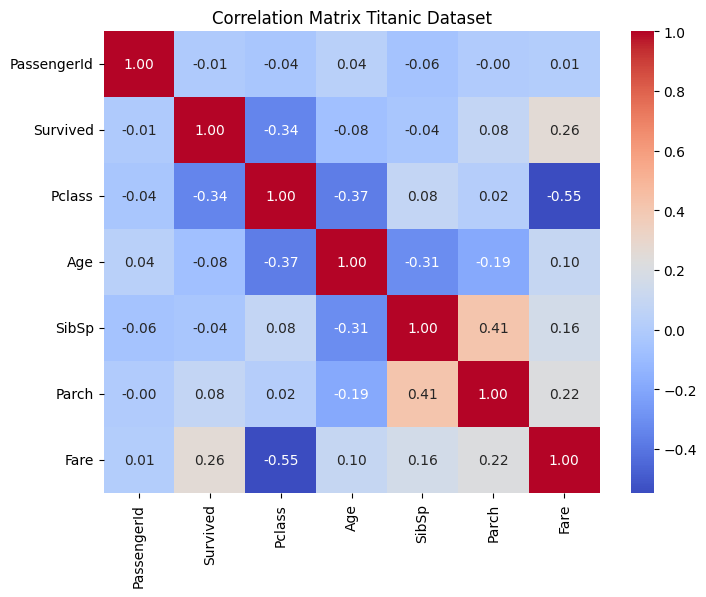

In [35]:
# pilih hanya kolom numerik
numeric_df = df_train.select_dtypes(include=['int64', 'float64'])

# hitung korelasi
corr = numeric_df.corr()

# visualisasi heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Titanic Dataset")
plt.show()

In [36]:
df_train_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_log
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,2.202765


# One Hot

In [37]:
categorical_cols = ["Sex", "Embarked"]

# One-hot encoding
df_train_encoded = pd.get_dummies(df_train_clean, columns=categorical_cols, drop_first=True)
df_test_encoded = pd.get_dummies(df_test_clean, columns=categorical_cols, drop_first=True)

df_test_encoded = df_test_encoded.reindex(columns=df_train_encoded.columns, fill_value=0)

print("Train shape:", df_train_encoded.shape)
print("Test shape:", df_test_encoded.shape)
df_train_encoded.head()

Train shape: (889, 13)
Test shape: (417, 13)


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Fare_log,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2.110213,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,4.280593,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,2.188856,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,3.990834,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,2.202765,True,False,True


# Scaling

In [38]:
from sklearn.preprocessing import StandardScaler

# Fitur numerik
num_cols = ["Age", "Fare", "SibSp", "Parch"]

scaler = StandardScaler()

df_train_encoded[num_cols] = scaler.fit_transform(df_train_encoded[num_cols])
df_test_encoded[num_cols] = scaler.transform(df_test_encoded[num_cols])

In [39]:
X_train = df_train_encoded.drop("Survived", axis=1)
y_train = df_train_encoded["Survived"]

X_test = df_test_encoded.copy()

# Modeling

In [40]:
# Drop kolom yang tidak dipakai
drop_cols = ["PassengerId", "Name", "Ticket", "Cabin"]

X_train_model = X_train.drop(columns=[col for col in drop_cols if col in X_train.columns])
X_test_model = X_test.drop(columns=[col for col in drop_cols if col in X_test.columns])

Logistic Regression: Accuracy=0.7930, F1=0.7167
Random Forest: Accuracy=0.8077, F1=0.7434
Gradient Boosting: Accuracy=0.8200, F1=0.7494
📊 Hasil Cross-Validation (5-Fold):


,Model,Accuracy,F1 Score
0,Logistic Regression,0.793043,0.716679
1,Random Forest,0.807681,0.743441
2,Gradient Boosting,0.820047,0.749426


<Figure size 800x500 with 0 Axes>

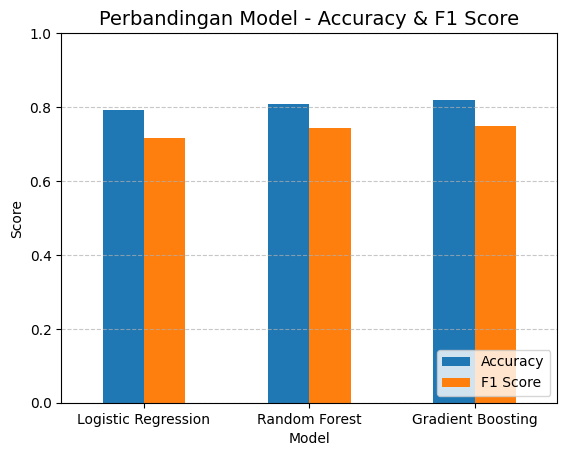

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Model dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Simpan hasil evaluasi
results = []
for name, model in models.items():
    acc = cross_val_score(model, X_train_model, y_train, cv=5, scoring="accuracy").mean()
    f1 = cross_val_score(model, X_train_model, y_train, cv=5, scoring="f1").mean()
    print(f"{name}: Accuracy={acc:.4f}, F1={f1:.4f}")
    # Append results as a dictionary
    results.append({"Model": name, "Accuracy": acc, "F1 Score": f1})


# Buat DataFrame
results_df = pd.DataFrame(results)

# Tampilkan tabel
print("📊 Hasil Cross-Validation (5-Fold):")
display(results_df)

# Visualisasi
plt.figure(figsize=(8,5))
results_df.set_index("Model")[["Accuracy", "F1 Score"]].plot(kind="bar", rot=0)
plt.title("Perbandingan Model - Accuracy & F1 Score", fontsize=14)
plt.ylabel("Score")
plt.ylim(0,1)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()